## 1. Import Libraries and Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv("../data/raw-energy-plants.csv")

C:\Users\Owner\AppData\Local\Temp\ipykernel_28528\1625350288.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw-energy-plants.csv")


In [43]:
pd.set_option("display.max_columns", None)

## 2. Data Set Overveiw

In [44]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.00,31.6700,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.00,31.6230,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.77,54.42,42.71,59.72,46.12,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
6,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
7,AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghani...,GEODB0040537,6.00,35.9416,68.7100,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.99,21.19,18.40,25.34,19.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
8,AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.00,34.5865,69.7757,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009799,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.23,82.87,69.15,93.83,80.00,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
9,ALB,Albania,Bistrica 1,WRI1002169,27.00,39.9116,20.1047,Hydro,NaN,NaN,NaN,1965.0,NaN,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/Documen...,GEODB,1021225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.17,75.26,79.50,105.45,88.45,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [45]:
df.shape

(34936, 36)

## 3. Data Types & Structures

In [46]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

## 4. Missing Value Statistics

### Missing Values Note
- Most of the other fules catigories (**other_fuel1, other_fuel2, and other_fuel3**) have the majority of the missing values. Only a select few run **2 or more energy sources so primary_fuel is the best way to organize the data set by energy source**.
- The wepp_id catigory only has an ID for the plants that are **registered int the PLATTS-WEPP** database and their are a number of reasons why they may not have one (not meeting the miniumne energy threshold, producing energy for a company, being personally owned, etc.)
- The **generation_gwh_2013 - 2019** have a bunch of missing values, to where they are not as reliable to compared to the **estimated_generation_gwh_2013 - 2019** 

In [47]:
missing_count = df.isna().sum()
top_missing = missing_count[missing_count > (34936/2)]
print(top_missing)

other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
dtype: int64


## 5. Summary Statistics

In [48]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


## 5. Initial Visual Diagnostic

### Top 10 Primary Fuel Sources
In the graph below shows the top primary sources found with in the dataset!

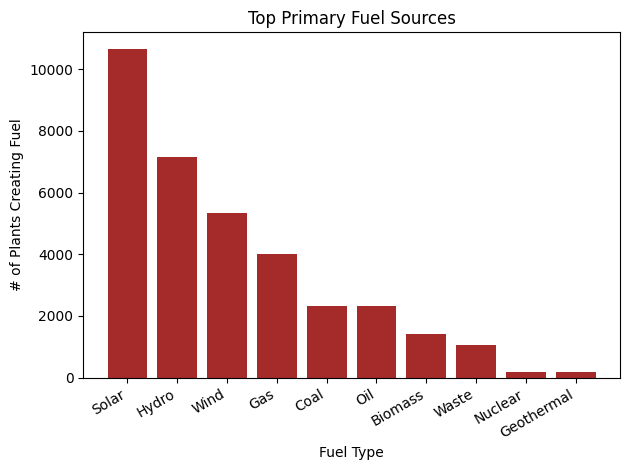

In [49]:
# organizing data to fit in graph
prime_fuel = df['primary_fuel'].value_counts().head(10)

#creating bar graph 
plt.bar(prime_fuel.index, prime_fuel, color="brown")

#give graph a title and nameing the x and y axis
plt.title("Top Primary Fuel Sources")
plt.xlabel("Fuel Type")
plt.ylabel("# of Plants Creating Fuel")

#changing the angle of the x axis labels
plt.xticks(rotation=30, ha='right')

#fixing layout
plt.tight_layout()

#show graph
plt.show()


### Columns with High Missing Values
This table show the coulms that have over 50% of their values as missing

Text(0, 0.5, 'Number of Missing Values')

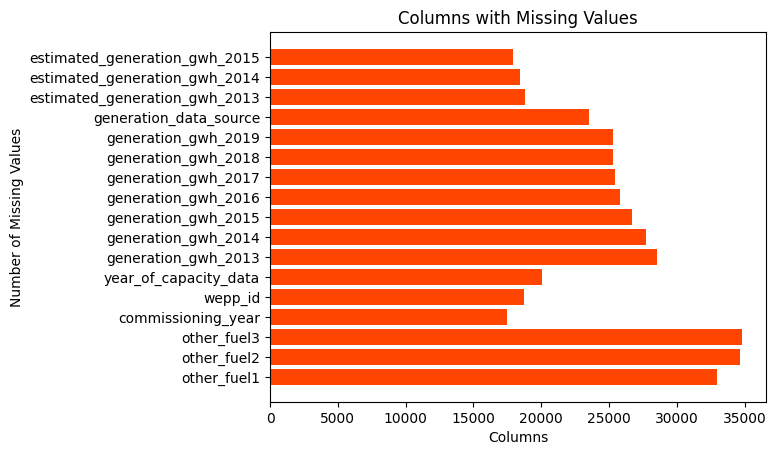

In [59]:
plt.barh(top_missing.index,top_missing, color='orangered')

plt.title("Columns with Missing Values")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")